/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

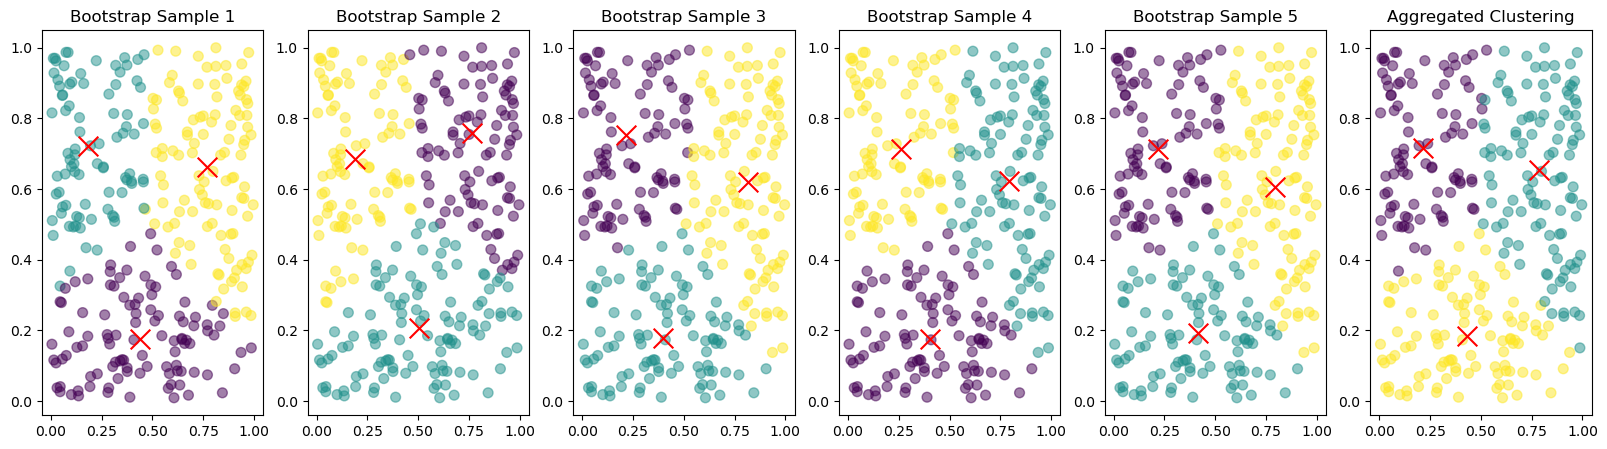

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(300, 2)

# Parameters for bagging
n_estimators = 5  # Number of bootstrap samples
k = 3  # Number of clusters

# Plotting setup
fig, axs = plt.subplots(1, n_estimators + 1, figsize=(20, 5))

# Store the centroids from each bootstrap sample
all_centroids = []

# Store the cluster labels for each sample
all_labels = []

for i in range(n_estimators):
    # Create a bootstrap sample
    X_resampled = resample(X)
    # Fit K-means to the bootstrap sample
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_resampled)
    all_centroids.append(kmeans.cluster_centers_)
    labels = kmeans.predict(X)
    all_labels.append(labels)
    
    # Plot the clustering result for this bootstrap sample
    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50, alpha=0.5)
    axs[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
    axs[i].set_title(f'Bootstrap Sample {i+1}')

# Aggregate the centroids
all_centroids = np.vstack(all_centroids)

# Final clustering by aggregating centroids
final_kmeans = KMeans(n_clusters=k, random_state=42)
final_kmeans.fit(all_centroids)
final_labels = final_kmeans.predict(X)

# Plot the final aggregated clustering result
axs[-1].scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis', marker='o', s=50, alpha=0.5)
axs[-1].scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
axs[-1].set_title('Aggregated Clustering')

plt.show()
